In [4]:
from collections import Counter
import pandas as pd
import numpy as np
import tqdm
import pickle
import matplotlib.pyplot as plt
from Bio.PDB import *
from rdkit import Chem
import os
import time
import shutil
from Bio.SeqUtils import seq1
import gzip
import tarfile
import sys
import random
from rdkit.Chem import rdFreeSASA
from rdkit import Chem
from rdkit.Chem.Descriptors import MolWt
import pybel
from rdkit.Chem.EnumerateStereoisomers import EnumerateStereoisomers

In [52]:
### 1. SDF to smiles using obabel (it takes ~3min)
path_to_dataset = "../data/docking/full_lib/CDI_BMS_DivSet_300k_CleanSlate.sdf.gz"
path_to_output = "../data/docking/full_lib/smiles.smi"

command = "obabel " + path_to_dataset + " -osmi > " + path_to_output
os.system(command)

0

In [38]:
# ### 1. Take smiles directly from SDF (it takes ~2min)
# sdf = pybel.readfile('sdf', '../data/docking/full_lib/CDI_BMS_DivSet_300k_CleanSlate.sdf.gz')
# smiles = [[i.data['BMS (canonical SMILES)'], i.data['IDNUMBER']] for i in tqdm.tqdm(sdf)]

# with open("../data/docking/full_lib/smiles.smi", "w") as f:
#     for s in smiles:
#         f.write("\t".join(s) + "\n")

300539it [01:54, 2634.11it/s]


In [2]:
smiles = pd.read_csv("../data/docking/full_lib/smiles.smi", sep='\t', names=['smiles', 'id'])
smiles

smiles         id
0       CC1(C)Cc2c(C#N)c(nc(c2CO1)N1CCOCC1)SCC(=O)Nc1c...  D396-0181
1                                          CC(CBr)n1ncnn1  8009-0167
2                     CCCCS(=O)(=O)N=C1NCN(CC(=O)[O-])CN1  5044-0010
3       C[C@@]12CC[C@H](O)C[C@H]1[C@@H](O)CC1[C@H]2C[C...  N037-0036
4                             Cc1[nH]c(=S)[nH]c(=O)c1CCCO  3399-0213
...                                                   ...        ...
300534  CCCCNC(=O)C1(CCC1)c1ccc(cc1)NS(=O)(=O)c1cc(OC)...  L426-0625
300535  CCCCN(CC)c1ccc(cc1C(=O)O)NS(=O)(=O)c1cc(F)c(F)cc1  F294-0550
300536  CN(C)CCN(CC)c1ccc(cc1NS(=O)(=O)c1ccc(C)cc1C)C(...  F295-0500
300537                Nc1c(Br)cc(cc1Br)NS(=O)(=O)c1ccccc1  R052-1647
300538                   Cc1ccc(cc1)NS(=O)(=O)c1ccc(N)cc1  R004-0058

[300539 rows x 2 columns]

In [3]:
mols = [Chem.MolFromSmiles(i) for i in tqdm.tqdm(smiles['smiles'], position=0)]

100%|██████████| 300539/300539 [00:56<00:00, 5328.46it/s]


In [7]:
stereoisomers = [len([j for j in EnumerateStereoisomers(i)]) for i in tqdm.tqdm(mols)]

100%|██████████| 300539/300539 [01:22<00:00, 3665.10it/s]


In [8]:
inchi = [Chem.MolToInchi(i) for i in mols]

RDKit WARNING: [17:05:04] WARNING: Omitted undefined stereo
RDKit WARNING: [17:05:04] WARNING: Proton(s) added/removed
RDKit WARNING: [17:05:04] WARNING: Omitted undefined stereo
RDKit WARNING: [17:05:04] WARNING: Omitted undefined stereo
RDKit WARNING: [17:05:04] WARNING: Omitted undefined stereo
RDKit WARNING: [17:05:04] WARNING: Omitted undefined stereo
RDKit WARNING: [17:05:04] WARNING: Charges were rearranged
RDKit WARNING: [17:05:04] WARNING: Omitted undefined stereo
RDKit WARNING: [17:05:04] WARNING: Omitted undefined stereo
RDKit WARNING: [17:05:04] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [17:05:04] WARNING: Charges were rearranged
RDKit WARNING: [17:05:04] WARNING: Proton(s) added/removed
RDKit WARNING: [17:05:04] WARNING: Charges were rearranged
RDKit WARNING: [17:05:04] WARNING: Omitted undefined stereo
RDKit WARNING: [17:05:04] WARNING: Omitted undefined stereo
RDKit WARNING: [17:05:04] WARNING: Omitted undefined stereo
RDKit WARNING: [17:0

In [9]:
stereoisomers

[1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 36,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 6,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 4,
 136,
 1,
 1,
 6,
 1,
 8,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 1,
 2,
 2,
 2,
 7,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 8,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 8,
 1,
 4,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 16,
 1,
 1,
 1,
 1,
 2,
 32,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 16,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 2,
 1,
 3,
 32,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 4,
 2,
 1,
 1,
 

  0%|          | 201/300539 [00:00<02:29, 2005.98it/s]RDKit WARNING: [17:01:38] WARNING: Omitted undefined stereo
RDKit WARNING: [17:01:38] WARNING: Proton(s) added/removed
RDKit WARNING: [17:01:38] WARNING: Omitted undefined stereo
RDKit WARNING: [17:01:38] WARNING: Omitted undefined stereo
RDKit WARNING: [17:01:38] WARNING: Omitted undefined stereo
RDKit WARNING: [17:01:38] WARNING: Omitted undefined stereo
RDKit WARNING: [17:01:38] WARNING: Charges were rearranged
RDKit WARNING: [17:01:38] WARNING: Omitted undefined stereo
RDKit WARNING: [17:01:38] WARNING: Omitted undefined stereo
RDKit WARNING: [17:01:38] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [17:01:38] WARNING: Charges were rearranged
RDKit WARNING: [17:01:38] WARNING: Proton(s) added/removed
RDKit WARNING: [17:01:38] WARNING: Charges were rearranged
RDKit WARNING: [17:01:38] WARNING: Omitted undefined stereo
RDKit WARNING: [17:01:38] WARNING: Omitted undefined stereo
RDKit WARNING: [17:01:38] 

  7%|▋         | 20684/300539 [00:03<00:54, 5173.71it/s]

KeyboardInterrupt: 

  7%|▋         | 20684/300539 [00:21<00:54, 5173.71it/s]

In [115]:
N = 100
print("\n".join(list([i + "\t" + j for i, j in zip(list(smiles['smiles'])[:N], list(smiles['id'])[:N])])))

CC1(C)Cc2c(C#N)c(nc(c2CO1)N1CCOCC1)SCC(=O)Nc1cc2ccccc2cc1	D396-0181
CC(CBr)n1ncnn1	8009-0167
CCCCS(=O)(=O)N=C1NCN(CC(=O)[O-])CN1	5044-0010
C[C@@]12CC[C@H](O)C[C@H]1[C@@H](O)CC1[C@H]2C[C@@H]2[C@H]3CN4C[C@@H](C)CC[C@@H]4[C@@H](C)[C@@H]3CC[C@]12O	N037-0036
Cc1[nH]c(=S)[nH]c(=O)c1CCCO	3399-0213
CN1[C@@H]2NC(=O)N[C@@H]2N(CCC)C1=O	6007-0025
CCOC(=O)c1c(N)nc2CCCn12	8018-5248
CCN1CCN(CC1)c1nccn2C(C)CN=c12	T849-0011
CN(C)Cc1nnnn1c1ccc(cc1)n1nnnc1CN(C)C	8008-7346
CC1(CC(=O)OCC)C=C(CC(=O)OCC)C(=C(N)C1(C#N)C#N)C#N	3483-0063
OC(=O)CCCC1OC(CCCC(=O)O)OC(CCCC(=O)O)O1	8019-4676
CCn1nnc2c1ncnc2NCCN1CCOCC1	G857-2311
O=C1CC(C2COC1O2)n1nnn(CCn2nnn(C3CC(=O)C4OC3CO4)c2=S)c1=S	8014-9077
Cn1cc(cn1)NC(=O)c1cc(n[nH]1)c1c(C)nn(CC)c1C	Y043-3433
COc1ccc(cc1)c1nc2ccc(cc2nc1c1ccc(cc1)OC)c1cc2nc(c(nc2cc1)c1ccc(cc1)OC)c1ccc(cc1)OC	2624-0195
CC(C)[C@@H](NC(=O)OC)C(=O)N1CCC[C@@H]1c1[nH]c(cn1)C#CC#CC#CC#Cc1cnc([nH]1)[C@H]1CCCN1C(=O)[C@H](NC(=O)OC)C(C)C	H027-4102C
Cc1cc(C)nc2sc3CN(C(=O)OC)N(Cc3[n+]12)C(=O)OC	8007-1521
[O-]

In [135]:
out = pybel.readfile('sdf', '/aloy/home/acomajuncosa/MurD/GitHub/docking/kraken/ligand_preparation/1/out.sdf')
lib = []

for i in out:
    print(str(i).strip())# + "\t".join([i.data['_MOLCOUNT'], i.data['DISTR[pH=7]'], i.data[ 'TAUTOMER_DISTRIBUTION']]))
    lib.append(str(i).strip().split("\t"))

CC1(C)Cc2c(C#N)c(nc(c2CO1)N1CCOCC1)SCC(=O)Nc1cc2ccccc2cc1	D396-0181
CC1(C)Cc2c(C#N)c(nc(c2CO1)N1CCOCC1)SCC(=O)Nc1cc2ccccc2cc1	D396-0181
C[C@H](CBr)n1ncnn1	8009-0167
C[C@@H](CBr)n1ncnn1	8009-0167
CCCCS(=O)(=O)NC1=NCN(CC(=O)[O-])CN1	5044-0010
CCCCS(=O)(=O)NC1=NCN(CC(=O)[O-])CN1	5044-0010
CCCCS(=O)(=O)NC1=NCN(CC(=O)[O-])CN1	5044-0010
CCCCS(=O)(=O)NC1=NCN(CC(=O)[O-])CN1	5044-0010
C[C@@]12CC[C@H](O)C[C@H]1[C@@H](O)C[C@H]1[C@H]2C[C@@H]2[C@H]3C[N@H+]4C[C@@H](C)CC[C@@H]4[C@@H](C)[C@@H]3CC[C@]12O	N037-0036
Cc1[nH]c(=S)nc(O)c1CCCO	3399-0213
Cc1[nH]c(=S)[nH]c(=O)c1CCCO	3399-0213
CN1[C@@H]2NC(=O)N[C@@H]2N(CCC)C1=O	6007-0025
CN1[C@H]2NC(=O)N[C@@H]2N(CCC)C1=O	6007-0025
CN1[C@@H]2NC(=O)N[C@H]2N(CCC)C1=O	6007-0025
CN1[C@H]2NC(=O)N[C@H]2N(CCC)C1=O	6007-0025
CCOC(=O)c1c(N)nc2CCCn12	8018-5248
CCOC(=O)c1c(N)nc2CCCn12	8018-5248
CC[N@@H+]1CCN(CC1)c1nccn2[C@H](C)CN=c12	T849-0011
CC[N@@H+]1CCN(CC1)c1nccn2[C@H](C)CN=c12	T849-0011
CC[N@@H+]1CCN(CC1)c1nccn2[C@H](C)CN=c12	T849-0011
CC[N@@H+]1CCN(CC1)c1nccn2[C@@H]

In [162]:
lib[17:37]

[['CC[N@@H+]1CCN(CC1)c1nccn2[C@H](C)CN=c12', 'T849-0011'],
 ['CC[N@@H+]1CCN(CC1)c1nccn2[C@H](C)CN=c12', 'T849-0011'],
 ['CC[N@@H+]1CCN(CC1)c1nccn2[C@H](C)CN=c12', 'T849-0011'],
 ['CC[N@@H+]1CCN(CC1)c1nccn2[C@@H](C)CN=c12', 'T849-0011'],
 ['CC[N@@H+]1CCN(CC1)c1nccn2[C@@H](C)CN=c12', 'T849-0011'],
 ['CC[N@@H+]1CCN(CC1)c1nccn2[C@@H](C)CN=c12', 'T849-0011'],
 ['CCN1CCN(CC1)c1nccn2[C@H](C)CN=c12', 'T849-0011'],
 ['CCN1CCN(CC1)c1nccn2[C@H](C)CN=c12', 'T849-0011'],
 ['CCN1CCN(CC1)c1nccn2[C@H](C)CN=c12', 'T849-0011'],
 ['CCN1CCN(CC1)c1nccn2[C@@H](C)CN=c12', 'T849-0011'],
 ['CCN1CCN(CC1)c1nccn2[C@@H](C)CN=c12', 'T849-0011'],
 ['CCN1CCN(CC1)c1nccn2[C@@H](C)CN=c12', 'T849-0011'],
 ['CC[N@@H+]1CCN(CC1)c1ncc[n+]2[C@H](C)CNc12', 'T849-0011'],
 ['CC[N@@H+]1CCN(CC1)c1ncc[n+]2[C@H](C)CNc12', 'T849-0011'],
 ['CC[N@H+]1CCN(CC1)c1ncc[n+]2[C@H](C)CNc12', 'T849-0011'],
 ['CC[N@H+]1CCN(CC1)c1ncc[n+]2[C@H](C)CNc12', 'T849-0011'],
 ['CC[N@@H+]1CCN(CC1)c1ncc[n+]2[C@@H](C)CNc12', 'T849-0011'],
 ['CC[N@@H+]1CCN(C

In [165]:
smiles[5:10]

smiles         id
5                 CN1[C@@H]2NC(=O)N[C@@H]2N(CCC)C1=O  6007-0025
6                            CCOC(=O)c1c(N)nc2CCCn12  8018-5248
7                      CCN1CCN(CC1)c1nccn2C(C)CN=c12  T849-0011
8               CN(C)Cc1nnnn1c1ccc(cc1)n1nnnc1CN(C)C  8008-7346
9  CC1(CC(=O)OCC)C=C(CC(=O)OCC)C(=C(N)C1(C#N)C#N)C#N  3483-0063

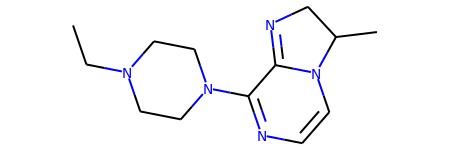

In [166]:
Chem.MolFromSmiles("CCN1CCN(CC1)c1nccn2C(C)CN=c12")

In [172]:
len([i for i in EnumerateStereoisomers(Chem.MolFromSmiles("CCN1CCN(CC1)c1nccn2C(C)CN=c12"))])

2

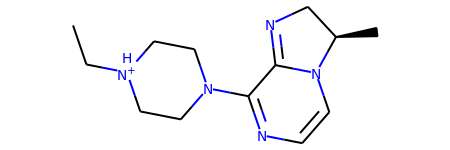

In [154]:
Chem.MolFromSmiles(lib[17][0])

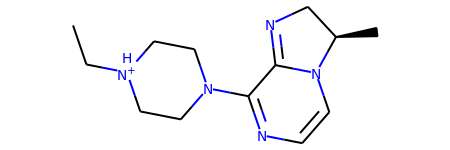

In [155]:
Chem.MolFromSmiles(lib[18][0])

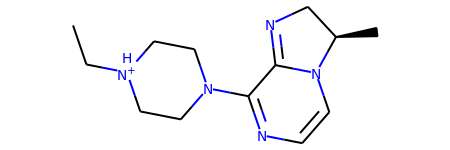

In [156]:
Chem.MolFromSmiles(lib[19][0])

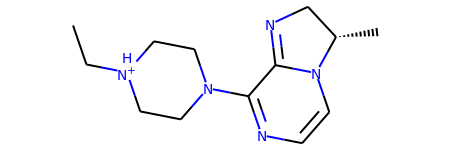

In [157]:
Chem.MolFromSmiles(lib[20][0])

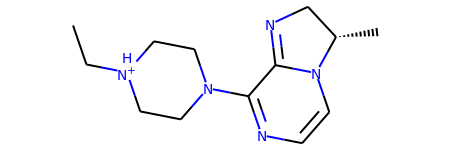

In [163]:
Chem.MolFromSmiles(lib[20][0])